# Purpose

To perform exploratory data analysis of dataset provided by the  U.S. Office of Foreign Labor Certification website.The dataset used can be found here... 

### Context

When a U.S. company wants to hire someone from outside of the United States for a special tier or technical position, they have to file an application with the United States government to get a visa for the applicant so that the applicant is allowed to stay in the country. Typically, the company will either file a green card application, called the perm application, or a labor condition application, called an LCA.LCAs include other specialty working visas, like H-1B visas.


### Questions I asked myself before start performing analysis (highly random and used to boost curiosity)

- In what states the Software engineers,data scientists,data analysts earn most?
- What is the salary variations among different job profiles in different states?
- How many applications were accepted per job profile?
- Is there any pattern emerging for growing salaries among job profiles?
- What is the most applied visa categry?
- What is the variation in job profiles among different countries?
- What is the success ration of visa approvals?
 - Which country has max visa approvals ratio?


# PRIMARY DATA OPERATIONS (cleaning and filtering)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 

warnings.filterwarnings('ignore') # this is used to ignore the warnings in the output

#importing file
path = 'C:\\Users\\Vivek\\Desktop\\PythonPrograms\\salary_data.xlsx'
dataset= pd.read_excel(path)

# this function is created to get rid of using info and head command on any dataset repeatedly
def data_basics(data):
    import pandas as pd
    head=data.head()
    info=print(data.info(),end='\n\n\n')
    return head, info


In [2]:
# Converting selelctive columns dtype to 'category' for better grouping

lis=['COUNTRY_OF_CITIZENSHIP','VISA_CLASS','JOB_TITLE_SUBGROUP','FULL_TIME_POSITION_Y_N','EXPERIENCE_REQUIRED_Y_N',\
     'EDUCATION_LEVEL_REQUIRED','PAID_WAGE_SUBMITTED_UNIT','CASE_STATUS','WORK_STATE']
for word in lis:
    
    dataset[word]=dataset[word].astype('category')
      

In [8]:
# Slicing dataset into sub dataset that serves columns only to perform salary based analysis

salary_columns= [ 'JOB_TITLE_SUBGROUP','JOB_TITLE','PREVAILING_WAGE_SUBMITTED','PREVAILING_WAGE_SUBMITTED_UNIT',\
                 'PAID_WAGE_SUBMITTED','PAID_WAGE_SUBMITTED_UNIT','PAID_WAGE_PER_YEAR','FULL_TIME_POSITION_Y_N','WORK_STATE',\
                 'VISA_CLASS','CASE_RECEIVED_DATE']

salary = dataset.loc[:,salary_columns]


In [7]:
data_basics(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 26 columns):
CASE_NUMBER                       167278 non-null object
CASE_STATUS                       167278 non-null category
CASE_RECEIVED_DATE                167278 non-null object
DECISION_DATE                     167278 non-null object
EMPLOYER_NAME                     167278 non-null object
PREVAILING_WAGE_SUBMITTED         167278 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167278 non-null object
PAID_WAGE_SUBMITTED               167278 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167278 non-null category
JOB_TITLE                         167278 non-null object
WORK_CITY                         167275 non-null object
EDUCATION_LEVEL_REQUIRED          11093 non-null category
COLLEGE_MAJOR_REQUIRED            11051 non-null object
EXPERIENCE_REQUIRED_Y_N           11093 non-null category
EXPERIENCE_REQUIRED_NUM_MONTHS    4965 non-null float64
COUNTRY_OF_CITIZENSHIP      

(          CASE_NUMBER CASE_STATUS CASE_RECEIVED_DATE DECISION_DATE  \
 0  I-200-14073-248840      denied          3/14/2014     3/21/2014   
 1       A-15061-55212      denied          3/19/2015     3/19/2015   
 2  I-200-13256-001092      denied          9/13/2013     9/23/2013   
 3  I-200-14087-353657      denied          3/28/2014      4/7/2014   
 4  I-203-14259-128844      denied          9/16/2014     9/23/2014   
 
                                        EMPLOYER_NAME  \
 0                ADVANCED TECHNOLOGY GROUP USA, INC.   
 1                     SAN FRANCISCO STATE UNIVERSITY   
 2                                    CAROUSEL SCHOOL   
 3  HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...   
 4                        SIGNAL SCIENCES CORPORATION   
 
    PREVAILING_WAGE_SUBMITTED PREVAILING_WAGE_SUBMITTED_UNIT  \
 0                  6217100.0                           year   
 1                  5067600.0                           year   
 2                  4947000.0       

---

# Data visualization

In [46]:
#Setting up the default figure size
sns.set(rc={'figure.figsize':(10,10)},style='white')

# salaries of data related rows

### BAR PLOTS variations

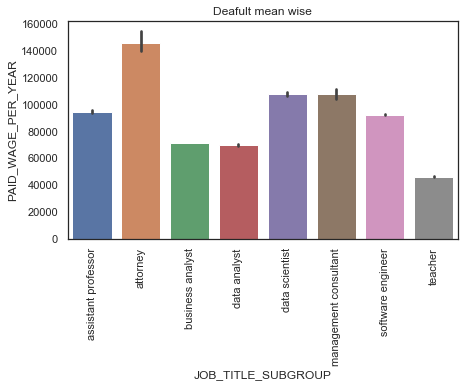

In [8]:
# prevaling wage difference and paid wage difference yearly 
# MEAN is the statistical method used to see variation

mean_salary_job_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,)
plt.xticks(rotation=90)
plt.title('Deafult mean wise')
plt.show()

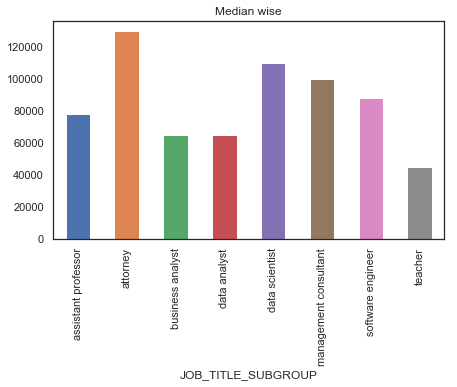

In [9]:
# Using grouping method as on standard pandas.plot method. 
# It was done as till now,I didnt know how to change 'estimator' arg. in seaborn barplot form mean to any other method
median_salary_group= salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].median()

# MEDIAN is the statistical method used to see variation
median_salary_job_plot = median_salary_group.plot('bar')
plt.title('Median wise')
plt.show()

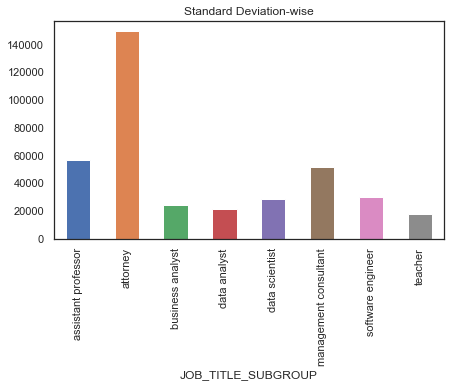

In [10]:
# Same reason as above.
stdev_salary_group=salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].std()

# STANDARD DEVIATION is the statistical method used to see variation
stdev_salary_job_plot= stdev_salary_group.plot('bar')
plt.title('Standard Deviation-wise')
plt.show()

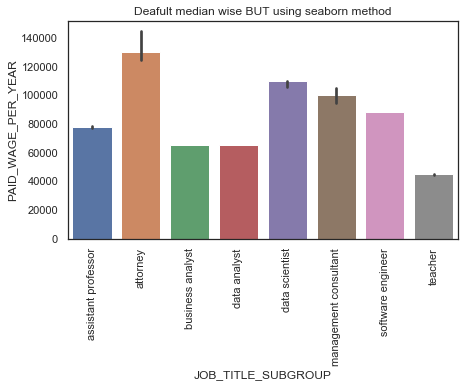

In [11]:
# as seen above plots we could see, we use df.plots methods for median or stdev plots, unable to manpiulate'estimator' arg in sns
# now, we can use numpy liberary fucntions to perform same analysis
'''ADVANTAGE
    1. Here, no need to group data and applying method prior'''

import numpy as np
median_salary_sns_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,estimator= np.median)
plt.xticks(rotation=90)
plt.title('Deafult median wise BUT using seaborn method')
plt.show()

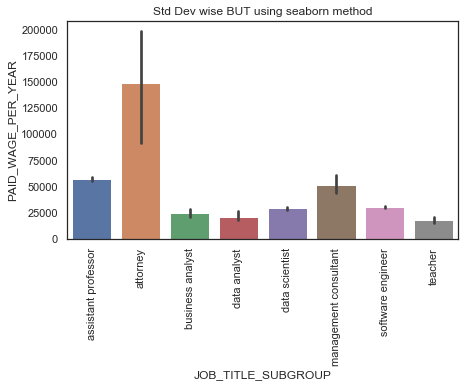

In [17]:
#plottind std deviation graph using seaborn
STD_salary_sns_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,estimator= np.std,)
plt.xticks(rotation=90)
plt.title('Std Dev wise BUT using seaborn method')
plt.show()

In [ ]:
#plotting sorted graph     
STD_salary_sns_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,estimator= np.std,)
plt.xticks(rotation=90)
plt.title('Std Dev wise BUT using seaborn method')
plt.show()

####  I am unable to plot sorted graph yet , issue in following graph

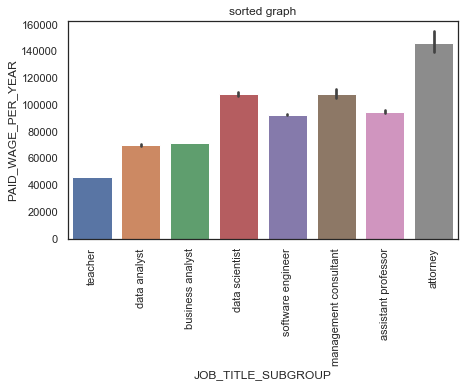

In [70]:
# trying to plot grapgh in order
result = salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].aggregate(np.std).reset_index()\
                                                                              .sort_values('PAID_WAGE_PER_YEAR')

result_plot= sns.barplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,data=result,order=result['JOB_TITLE_SUBGROUP'])
plt.xticks(rotation=90)
plt.title('sorted graph')
plt.show()
result_plot.figure.savefig('output.jpeg',bbox_inches='tight')

In [71]:
result

,JOB_TITLE_SUBGROUP,PAID_WAGE_PER_YEAR
7,teacher,17636.796079
3,data analyst,21045.301133
2,business analyst,24186.505276
4,data scientist,28883.056121
6,software engineer,30116.068568
5,management consultant,51859.846233
0,assistant professor,56870.174335
1,attorney,149514.207306


## Conclusion/Analysis

- Highest Salary job are __Attorney__ folloed by __Data Scientists and Managment consultants__ .
- While teaching profession is least paid.


## VISA based job analysis

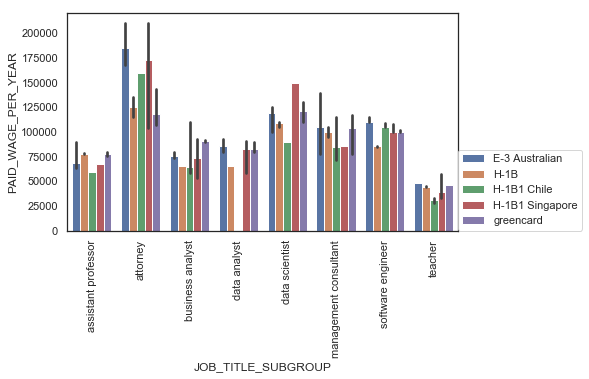

In [13]:
visa_job_bar = sns.barplot(x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,hue=salary.VISA_CLASS)
plt.xticks(rotation=90)
plt.legend(loc=(1,0))
plt.show()

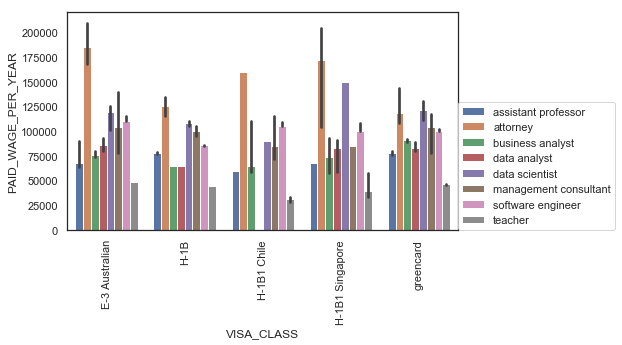

In [14]:
visa_job_bar1 = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,hue=salary.JOB_TITLE_SUBGROUP)
plt.xticks(rotation=90)
plt.legend(loc=(1,0))
plt.show()

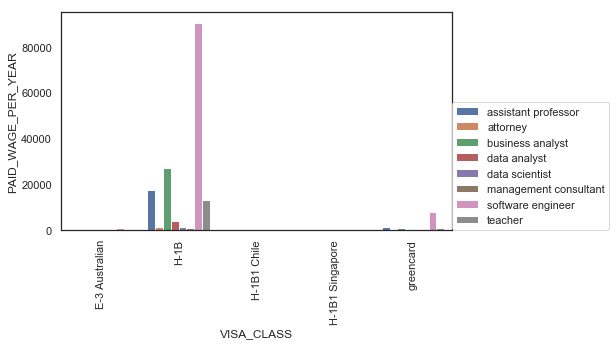

In [15]:
# this performs of counts of records per visa class
visa_job_count_bar = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=pd.Series.count,\
                                 hue=salary.JOB_TITLE_SUBGROUP)
plt.xticks(rotation=90)
plt.legend(loc=(1,0))
plt.show()

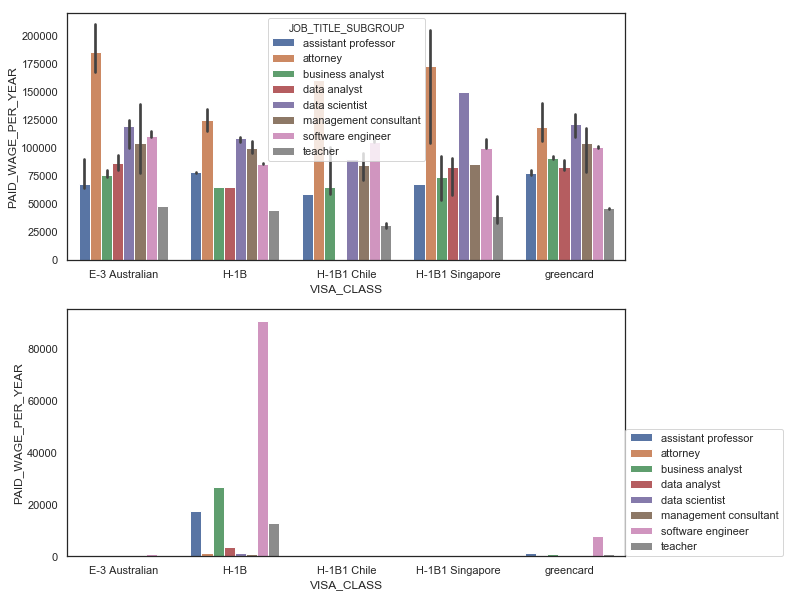

In [16]:
# using above tow graphs in subplots manner
f,axes= plt.subplots(2,1,figsize=(10,10),)

visa_job_bar1 = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,\
                            hue=salary.JOB_TITLE_SUBGROUP,ax=axes[0])
visa_job_count_bar = sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=pd.Series.count\
                                 ,hue=salary.JOB_TITLE_SUBGROUP,ax=axes[1])

plt.legend(loc=(1,0))
plt.show()
f.savefig('subplot.jpeg',bbox_inch='Bbox')

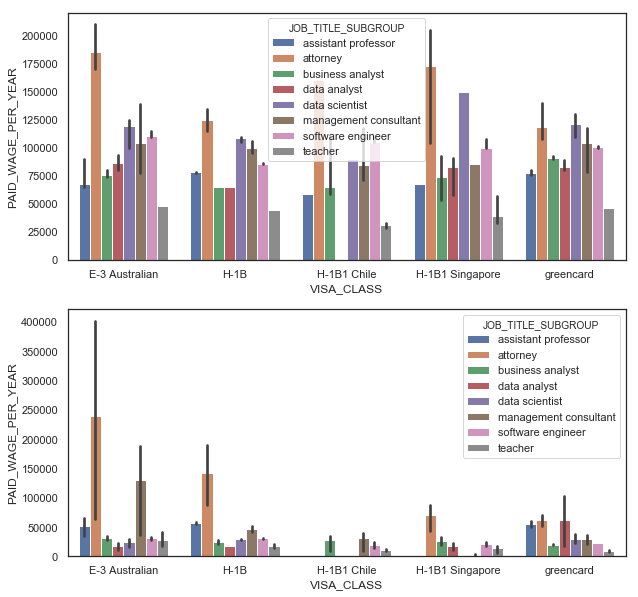

In [41]:
# checking the relation bw 2 graphs
#1. median of salarys
#2. std of salaries

f,axes= plt.subplots(nrows=2,ncols=1,figsize=(10,10))

visa_salary_median= sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=np.median,hue=salary.JOB_TITLE_SUBGROUP\
                                ,ax=axes[0])


visa_salary_std= sns.barplot(x=salary.VISA_CLASS,y=salary.PAID_WAGE_PER_YEAR,estimator=np.std,hue=salary.JOB_TITLE_SUBGROUP,\
                             ax=axes[1])
plt.show()

### Conclusion

- We learnt that highest number of Visa that is used to bring foriegn talent in the U.S.A. is the __H1B__ followed by the __Green Card__.
- Most hiring positions were __Software Engineers__ followed by __Business Analyst__ through __H1B_ visa__.

---

## Testing block

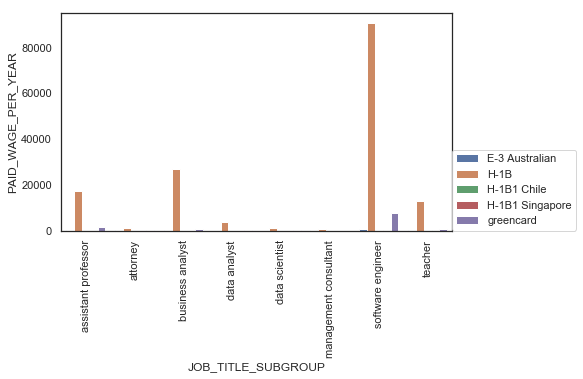

In [30]:
visa_job_count_bar_test=sns.barplot(x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR,estimator=pd.Series.count,\
                                 hue=salary.VISA_CLASS)
plt.xticks(rotation=90)
plt.legend(loc=(1,0))
plt.show()

### sorting data points

In [19]:
result

,JOB_TITLE_SUBGROUP,PAID_WAGE_PER_YEAR
7,teacher,44896.0
2,business analyst,65000.0
3,data analyst,65000.0
0,assistant professor,78000.0
6,software engineer,88275.2
5,management consultant,100000.0
4,data scientist,110000.0
1,attorney,130000.0


In [101]:
data_basics(result)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 7 to 1
Data columns (total 2 columns):
JOB_TITLE_SUBGROUP    8 non-null category
PAID_WAGE_PER_YEAR    8 non-null float64
dtypes: category(1), float64(1)
memory usage: 520.0 bytes
None




(    JOB_TITLE_SUBGROUP  PAID_WAGE_PER_YEAR
 7              teacher             44896.0
 2     business analyst             65000.0
 3         data analyst             65000.0
 0  assistant professor             78000.0
 6    software engineer             88275.2, None)

In [80]:
mean_salary_job_plot_pandas= salary.plot(kind='bar',y=salary.PAID_WAGE_PER_YEAR)
plt.xticks(rotation=90)
plt.title('Deafult mean wise')
plt.show()

KeyError: '[62171. 91440. 49470. ... 10920. 10608. 10504.] not in index'

In [113]:
result[['JOB_TITLE_SUBGROUP','PAID_WAGE_PER_YEAR']]

,JOB_TITLE_SUBGROUP,PAID_WAGE_PER_YEAR
7,teacher,44896.0
2,business analyst,65000.0
3,data analyst,65000.0
0,assistant professor,78000.0
6,software engineer,88275.2
5,management consultant,100000.0
4,data scientist,110000.0
1,attorney,130000.0


---

## Question: Wouldn't my salary likely to change in different states for data analysis related jobs.

Understanding how salaries vary among different states in U.S.A.

In [4]:

dic={'WA':'WASHINGTON','CA':'CALIFORNIA','CO':'COLORADO','TX':'TEXAS','AL':'ALABAMA','NC':'NORTH CAROLINA','NY':'NEW YORK',\
     'MA':'MASSACHUSETTS','ME':'MAINE'}

# refining state names by replacing abbreviations with full name of required set from 'WORK_STATE' column
dataset['WORK_STATE']= dataset.WORK_STATE.replace( {'WA':'WASHINGTON','CA':'CALIFORNIA','CO':'COLORADO','TX':'TEXAS',\
                                                    'AL':'ALABAMA','NC':'NORTH CAROLINA','NY':'NEW YORK','MA':'MASSACHUSETTS',\
                                                    'ME':'MAINE'})

In [5]:
# we are concerned about few states, where we want to analyse jobs related information mentioned as follows
state=['NEW YORK','WASHINGTON','CALIFORNIA','COLORADO','TEXAS','ALABAMA','NORTH CAROLINA','MASSACHUSETTS','MAINE']

want_states=[]
for word in dataset.WORK_STATE:
    if word not in state:
        want_states.append(word)

dataset['WORK_STATE']= dataset.WORK_STATE.replace(want_states,'OTHERS')

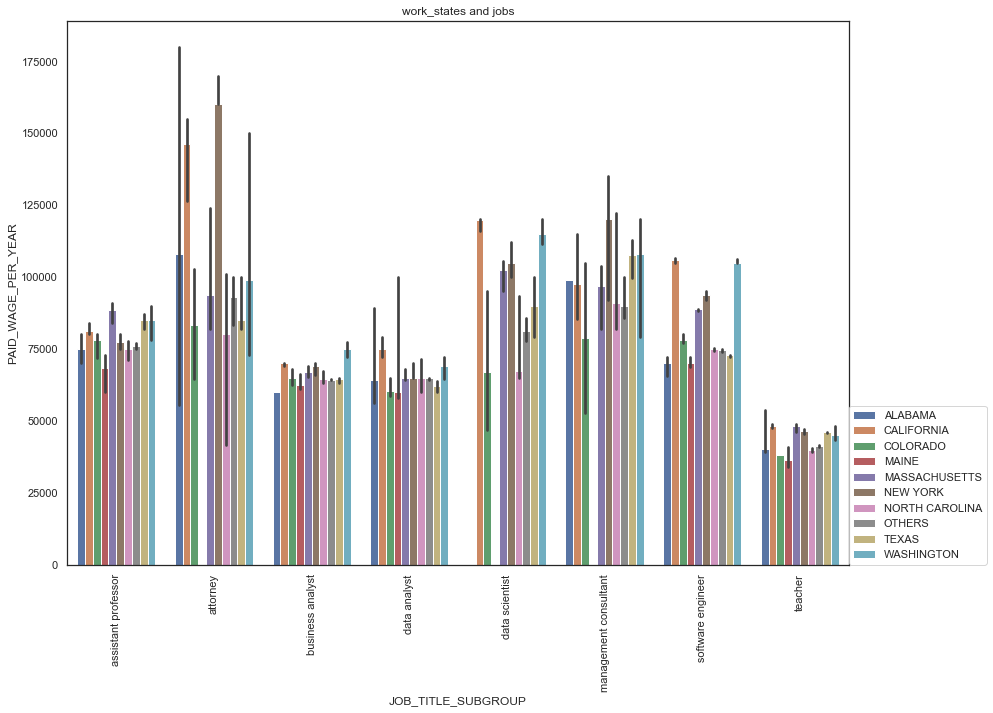

In [52]:
# plotting job title subgroup against work state to identify how different jobs are varied among different states
plt.figure(figsize=(14,10))
state_job_bar=sns.barplot(x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR,hue=salary.WORK_STATE,estimator=np.median)
plt.legend(loc=(1,0))
plt.xticks(rotation=90)
plt.title('work_states and jobs')
plt.show()

### filtering outliers from attorney  and others category in work state

In [15]:
salary1 = salary.loc[salary.PAID_WAGE_PER_YEAR<1500000,]
salary1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167273 entries, 0 to 167277
Data columns (total 11 columns):
JOB_TITLE_SUBGROUP                167273 non-null category
JOB_TITLE                         167273 non-null object
PREVAILING_WAGE_SUBMITTED         167273 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167273 non-null object
PAID_WAGE_SUBMITTED               167273 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167273 non-null category
PAID_WAGE_PER_YEAR                167273 non-null float64
FULL_TIME_POSITION_Y_N            156180 non-null category
WORK_STATE                        167273 non-null object
VISA_CLASS                        167273 non-null category
CASE_RECEIVED_DATE                167273 non-null datetime64[ns]
dtypes: category(4), datetime64[ns](1), float64(3), object(3)
memory usage: 10.8+ MB


In [16]:
salary1=salary1.loc[salary1.WORK_STATE !='OTHERS']
salary1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91077 entries, 1 to 167269
Data columns (total 11 columns):
JOB_TITLE_SUBGROUP                91077 non-null category
JOB_TITLE                         91077 non-null object
PREVAILING_WAGE_SUBMITTED         91077 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    91077 non-null object
PAID_WAGE_SUBMITTED               91077 non-null float64
PAID_WAGE_SUBMITTED_UNIT          91077 non-null category
PAID_WAGE_PER_YEAR                91077 non-null float64
FULL_TIME_POSITION_Y_N            84411 non-null category
WORK_STATE                        91077 non-null object
VISA_CLASS                        91077 non-null category
CASE_RECEIVED_DATE                91077 non-null datetime64[ns]
dtypes: category(4), datetime64[ns](1), float64(3), object(3)
memory usage: 5.9+ MB


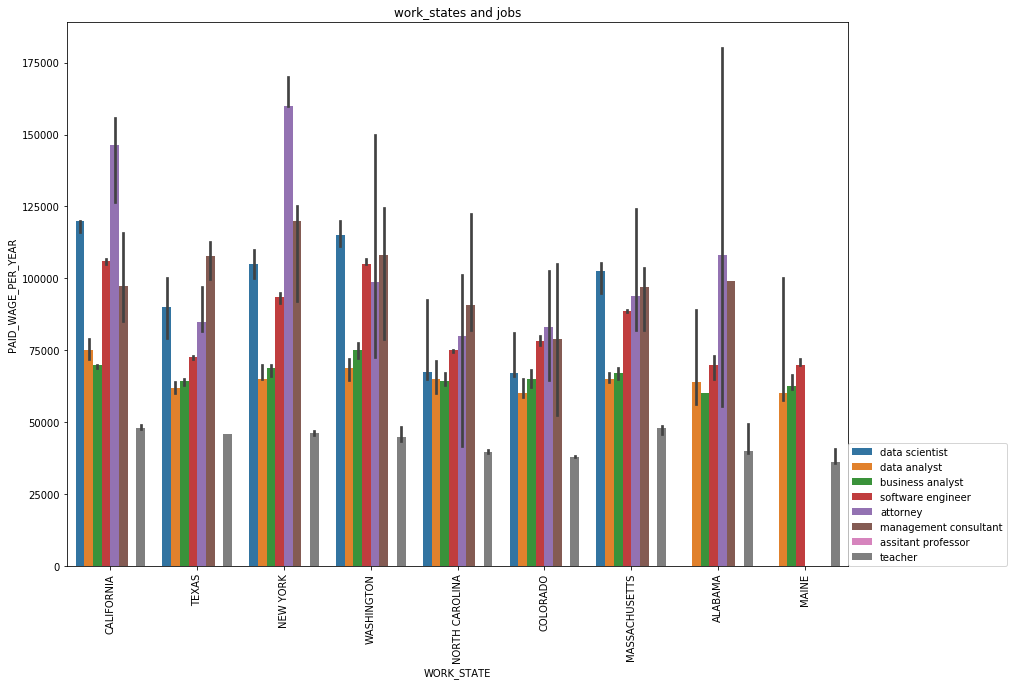

In [17]:
# plotting job title subgroup against work state to identify how different jobs are varied among different states
lis=['data scientist','data analyst','business analyst','software engineer','attorney','management consultant','assitant professor'\
       , 'teacher']
plt.figure(figsize=(14,10))
state_job_bar=sns.barplot(x=salary1.WORK_STATE,y=salary1.PAID_WAGE_PER_YEAR,hue=salary1.JOB_TITLE_SUBGROUP,estimator=np.median,\
                          hue_order=lis)
plt.legend(loc=(1,0))
plt.xticks(rotation=90)
plt.title('work_states and jobs')
plt.show()

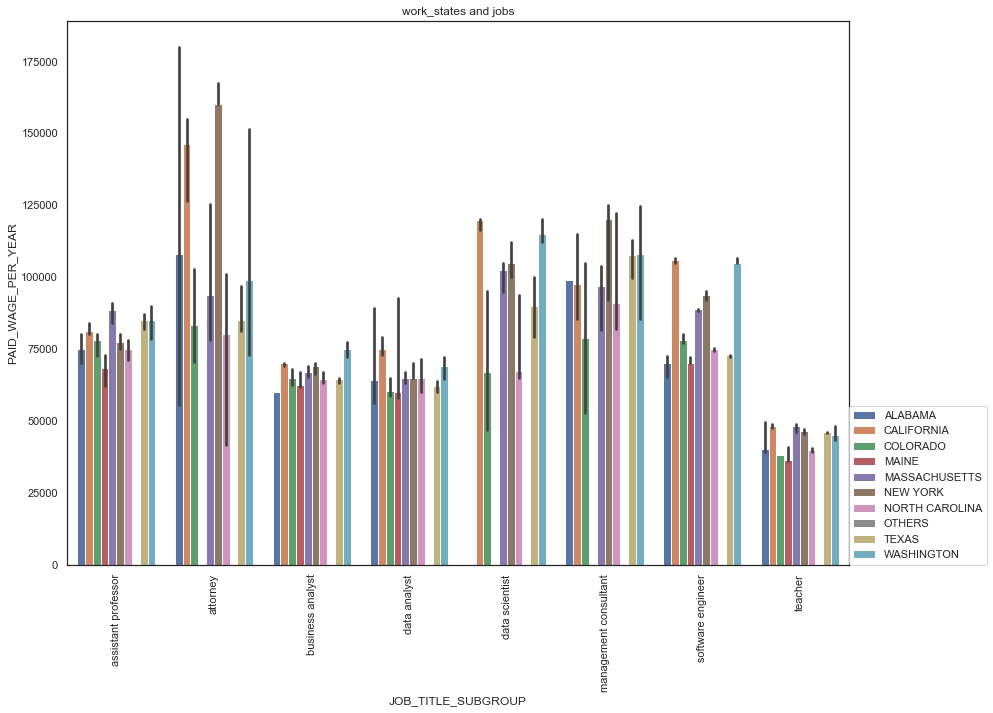

In [57]:
# plotting job title subgroup against work state to identify how different jobs are varied among different states
plt.figure(figsize=(14,10))
state_job_bar=sns.barplot(x=salary1.JOB_TITLE_SUBGROUP,y=salary1.PAID_WAGE_PER_YEAR,hue=salary1.WORK_STATE,estimator=np.median)
plt.legend(loc=(1,0))
plt.xticks(rotation=90)
plt.title('work_states and jobs')
plt.show()

---

## When to use line graphs

### Best for cnveying two types of information
- how things change over time.
- how two continuous variables relate to one another



## Understading how salaries vary over time

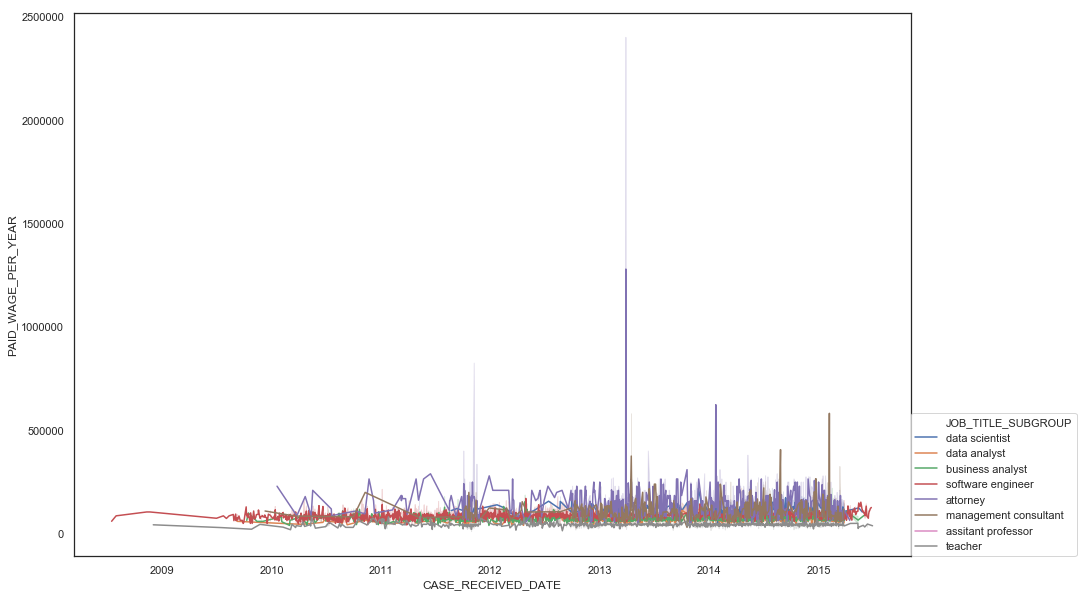

In [56]:
# plotting jobs salaries variations over a period of time
plt.figure(figsize=(15,10))
salary_time_line = sns.lineplot(x=salary.CASE_RECEIVED_DATE,y=salary.PAID_WAGE_PER_YEAR,hue=salary.JOB_TITLE_SUBGROUP,\
                                hue_order=lis,estimator=np.median,dashes=False)
plt.legend(loc=(1,0))
plt.show()

as we could see the graph came out to be abosolute conntinuous and quite complicated to extract insights. We need graph that is continuous in year gap, hence following is the required graph.

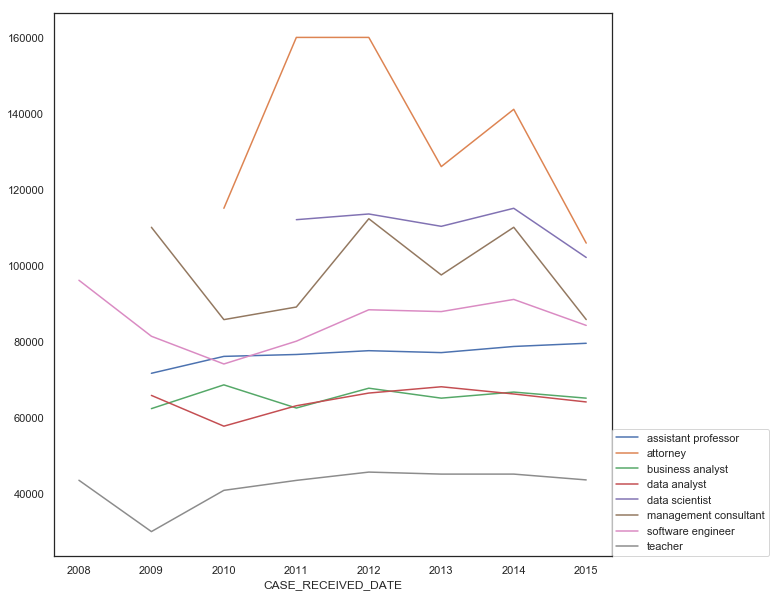

In [55]:
#filtering dataset
year_median= salary2.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].resample('Y').median()
line_plot_data = year_median.unstack().transpose()

line_plot = line_plot_data.plot.line()
plt.legend(loc=(1,0))
plt.show()

TypeError: reduction operation 'mean' not allowed for this dtype

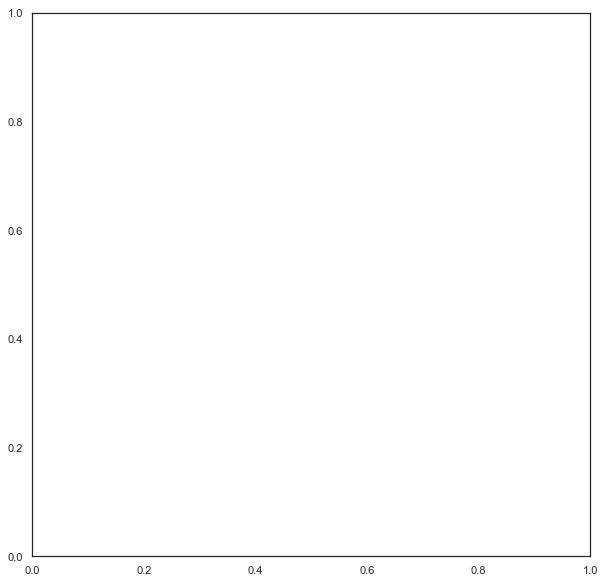

In [84]:
reg = sns.regplot(x=salary.CASE_RECEIVED_DATE,y=salary.PAID_WAGE_PER_YEAR,x_estimator=np.mean,scatter=False,)

In [81]:
salary = salary.drop('index',axis=1)

In [78]:
salary.reset_index(inplace=True)
salary.head

<bound method NDFrame.head of          index CASE_RECEIVED_DATE   JOB_TITLE_SUBGROUP  \
0            0         2014-03-14    software engineer   
1            1         2015-03-19  assistant professor   
2            2         2013-09-13              teacher   
3            3         2014-03-28              teacher   
4            4         2014-09-16    software engineer   
5            5         2014-04-02     business analyst   
6            6         2013-03-25    software engineer   
7            7         2013-05-06    software engineer   
8            8         2013-05-10    software engineer   
9            9         2014-03-10    software engineer   
10          10         2011-11-28    software engineer   
11          11         2014-04-03     business analyst   
12          12         2011-06-21    software engineer   
13          13         2014-01-16    software engineer   
14          14         2014-02-05    software engineer   
15          15         2011-11-01    softw

In [82]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167278 entries, 0 to 167277
Data columns (total 11 columns):
CASE_RECEIVED_DATE                167278 non-null datetime64[ns]
JOB_TITLE_SUBGROUP                167278 non-null category
JOB_TITLE                         167278 non-null object
PREVAILING_WAGE_SUBMITTED         167278 non-null float64
PREVAILING_WAGE_SUBMITTED_UNIT    167278 non-null object
PAID_WAGE_SUBMITTED               167278 non-null float64
PAID_WAGE_SUBMITTED_UNIT          167278 non-null category
PAID_WAGE_PER_YEAR                167278 non-null float64
FULL_TIME_POSITION_Y_N            156185 non-null category
WORK_STATE                        167278 non-null object
VISA_CLASS                        167278 non-null category
dtypes: category(4), datetime64[ns](1), float64(3), object(3)
memory usage: 9.6+ MB


In [67]:
salary = salary.set_index('CASE_RECEIVED_DATE')

In [71]:
line_plot_data

JOB_TITLE_SUBGROUP,assistant professor,attorney,business analyst,data analyst,data scientist,management consultant,software engineer,teacher
CASE_RECEIVED_DATE,,,,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN,NaN,96046.8,43379.0
2009-12-31,71547.84,NaN,62240.0,65724.0,NaN,110000.0,81299.5,29860.0
2010-12-31,76000.00,115000.0,68500.0,57619.5,NaN,85680.0,74000.0,40723.0
2011-12-31,76500.00,160000.0,62400.0,63000.0,112000.0,89000.0,80000.0,43343.2
2012-12-31,77500.00,160000.0,67621.0,66342.5,113500.0,112250.0,88275.2,45530.0
2013-12-31,76993.00,125981.5,65000.0,68000.0,110250.0,97446.0,87797.0,45000.0
2014-12-31,78612.00,141064.5,66600.0,66100.0,115000.0,110000.0,91000.0,45000.0
2015-12-31,79450.00,105831.2,65000.0,64000.0,102050.0,85696.0,84157.0,43470.0


In [72]:
# Facetgrid

g = sns.FacetGrid(line_plot_data='JOB_TITLE_SUBGROUP',hue='JOB_TITLE_SUBGROUP')
g = g.map(plt.plot,'CASE_RECEIVED_DATE','PAID_WAGE_PER_YEAR')

TypeError: __init__() got an unexpected keyword argument 'line_plot_data'

# testing block

In [67]:
# sort try
sort = salary1.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].median().sort_values()
sort

JOB_TITLE_SUBGROUP
teacher                   45880.0
data analyst              66602.5
business analyst          68000.0
assistant professor       80004.0
software engineer         99674.0
management consultant    103688.0
data scientist           115000.0
attorney                 160000.0
Name: PAID_WAGE_PER_YEAR, dtype: float64

### BOX PLOTS

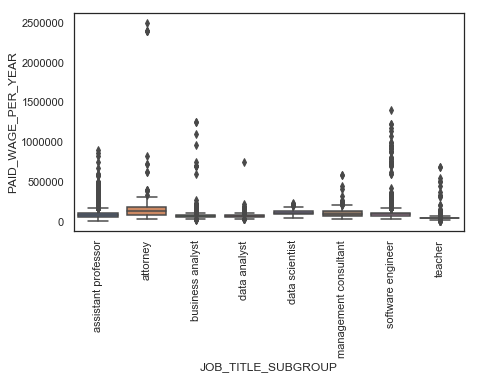

In [97]:
# PLotting BOXPLOT for above graph to identify presence of outlier
salary_job_boxplot= sns.boxplot(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,)
plt.xticks(rotation=90)
plt.show()

#### Here, we could see __attorney__ subgroup has relatively high outliers.To remove them there are two methods.
- By reducing the salary limits


In [95]:
salary1 = salary.loc[salary.PAID_WAGE_PER_YEAR<1500000,]

In [9]:
sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [10]:
graph= plt.bar(y=salary.PAID_WAGE_PER_YEAR,x=salary.JOB_TITLE_SUBGROUP,height=)

SyntaxError: invalid syntax (<ipython-input-10-bddc48e853a7>, line 1)

In [23]:
c=salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].value_counts().unstack().fillna(0)
c

PAID_WAGE_PER_YEAR,10500.0,10504.0,10608.0,10920.0,11648.0,12000.0,15100.8,15142.4,15425.279999999999,15600.0,...,1080000.0,1103711.73,1139001.0,1176000.0,1222788.0,1224800.6,1250784.0,1400000.0,2400000.0,2500000.0
JOB_TITLE_SUBGROUP,,,,,,,,,,,,,,,,,,,,,
assistant professor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
attorney,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
business analyst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
data analyst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data scientist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
management consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
software engineer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
teacher,0.0,2.0,1.0,2.0,4.0,1.0,6.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


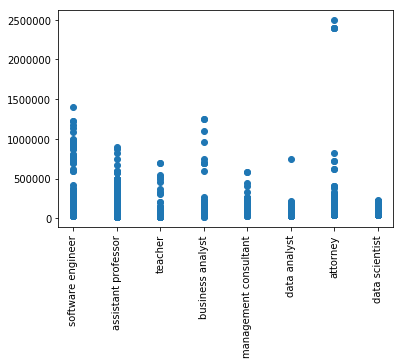

In [59]:
graph3 = plt.scatter(data=a,x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR)
plt.xticks(rotation=90)
plt.show()

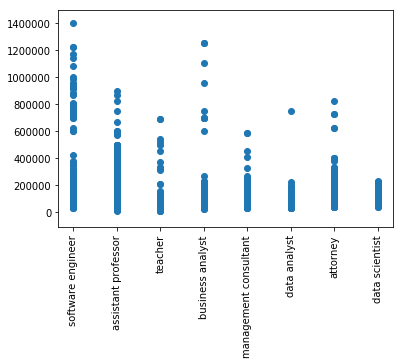

In [42]:
graph4 = plt.scatter(data=b,x=salary.JOB_TITLE_SUBGROUP,y=salary.PAID_WAGE_PER_YEAR)
plt.ylim(ymax=1500000)
plt.xticks(rotation=90)
plt.show()

In [41]:
salary.loc[(salary.JOB_TITLE_SUBGROUP=='attorney') & (salary.PAID_WAGE_PER_YEAR >1500000)]

,JOB_TITLE_SUBGROUP,JOB_TITLE,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,PAID_WAGE_PER_YEAR,FULL_TIME_POSITION_Y_N
160,attorney,ATTORNEY,207106.0,year,2400000.0,year,2400000.0,y
232,attorney,ASSOCIATE ATTORNEY,192379.0,year,2500000.0,year,2500000.0,y
266,attorney,ATTORNEY,188053.0,year,2400000.0,year,2400000.0,y
267,attorney,ATTORNEY,188053.0,year,2400000.0,year,2400000.0,y
268,attorney,ATTORNEY,188053.0,year,2400000.0,year,2400000.0,y


In [8]:
b= salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR']